# Step 3 - Climate Analysis and Exploration

Use SQLAlchemy to model your table schemas and create a sqlite database for your tables. You will need one table for measurements and one for stations.

Create a Jupyter Notebook called database_engineering.ipynb and use this to complete all of your Database Engineering work.

Use Pandas to read your cleaned measurements and stations CSV data.

Use the engine and connection string to create a database called hawaii.sqlite.

Use declarative_base and create ORM classes for each table.

You will need a class for Measurement and for Station.

Make sure to define your primary keys.

Once you have your ORM classes defined, create the tables in the database using create_all.

In [ ]:
# Just throwing every library I know of in here
# Python SQL toolkit and Object Relational Mapper
import pandas as pd
import numpy as np
import sqlalchemy
import datetime as dt
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [3]:
# Use the engine and connection string to create a database called hawaii.sqlite.
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)

### Precipitation Analysis

Design a query to retrieve the last 12 months of precipitation data.

Select only the date and prcp values.

Load the query results into a Pandas DataFrame and set the index to the date column.

Plot the results using the DataFrame plot method.

In [6]:
lastYear = dt.datetime.today() - dt.timedelta(days=365)

In [7]:
print(lastYear)

2017-04-12 01:23:36.291022


In [8]:
DatePrcp = session.query(Measurement.hw_date, Measurement.prcp)

In [9]:
print(DatePrcp)

SELECT measurement.hw_date AS measurement_hw_date, measurement.prcp AS measurement_prcp 
FROM measurement


In [10]:
DatePrcp = session.query(Measurement.hw_date, Measurement.prcp).filter(Measurement.hw_date >= lastYear).all()

In [11]:
print(DatePrcp)

[('2017-04-13', 0.0), ('2017-04-14', 0.26), ('2017-04-15', 0.01), ('2017-04-16', 0.0), ('2017-04-17', 0.02), ('2017-04-18', 0.0), ('2017-04-19', 0.02), ('2017-04-20', 0.05), ('2017-04-21', 0.23), ('2017-04-22', 0.32), ('2017-04-23', 0.03), ('2017-04-24', 0.0), ('2017-04-25', 0.0), ('2017-04-26', 0.0), ('2017-04-27', 0.0), ('2017-04-28', 0.0), ('2017-04-29', 0.12), ('2017-04-30', 0.89), ('2017-05-01', 0.26), ('2017-05-02', 0.0), ('2017-05-03', 0.0), ('2017-05-04', 0.0), ('2017-05-05', 0.0), ('2017-05-06', 0.0), ('2017-05-07', 0.0), ('2017-05-08', 0.0), ('2017-05-10', 0.0), ('2017-05-11', 0.01), ('2017-05-12', 0.0), ('2017-05-13', 0.0), ('2017-05-14', 0.0), ('2017-05-15', 0.05), ('2017-05-16', 0.01), ('2017-05-17', 0.0), ('2017-05-18', 0.01), ('2017-05-19', 0.0), ('2017-05-20', 0.0), ('2017-05-21', 0.0), ('2017-05-22', 0.0), ('2017-05-23', 0.08), ('2017-05-24', 0.13), ('2017-05-25', 0.15), ('2017-05-27', 0.01), ('2017-05-28', 0.02), ('2017-05-29', 0.0), ('2017-05-30', 0.26), ('2017-05-31

In [12]:
precipitation_df = pd.DataFrame(DatePrcp)

In [13]:
precipitation_df.head()

,hw_date,prcp
0,2017-04-13,0.00
1,2017-04-14,0.26
2,2017-04-15,0.01
3,2017-04-16,0.00
4,2017-04-17,0.02


<IPython.core.display.Javascript object>


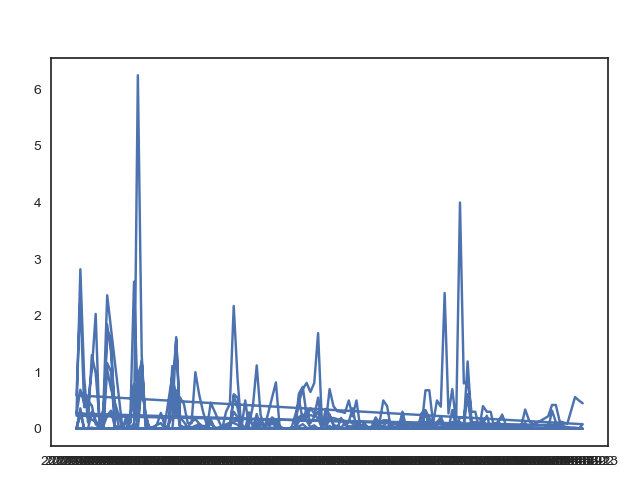

In [14]:
plt.plot(precipitation_df["hw_date"],precipitation_df["prcp"])
plt.show()